In [2]:
pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 228.9 kB/s eta 0:00:00m eta 0:00:010:00:02
You should consider upgrading via the '/home/daniel/mipt/anomaly_prediction/myenv_py37/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install iisignature

  Using cached iisignature-0.24.tar.gz (1.3 MB)
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for iisignature, since package 'wheel' is not installed.
  Running setup.py install for iisignature ... one
You should consider upgrading via the '/home/daniel/mipt/anomaly_prediction/myenv_py37/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 517.0 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 189.1 kB/s eta 0:00:000:00:010:00:01:01
  Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 234.0 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 624.9 kB/s eta 0:00:000:00:01m eta 0:00:01
You should consider upgrading via the '/home/daniel/mipt/anomaly_prediction/myenv_py37/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import iisignature
import matplotlib.pyplot as plt

In [5]:
help(iisignature)

Help on module iisignature:

NAME
    iisignature - iisignature: Iterated integral signature and logsignature calculations

DESCRIPTION
    Please find documentation at http://www2.warwick.ac.uk/jreizenstein and code at https://github.com/bottler/iisignature.

FUNCTIONS
    basis(...)
        basis(s) 
        Returns a tuple of strings which are the basis elements of the log signature. s must have come from prepare. This function is work in progress, especially for dimension greater than 8. An example of how to parse the output of this function can be seen in the tests.
    
    info(...)
        info(s) 
        Returns a dictionary of information about the opaque object s. s must have come from prepare.
    
    logsig(...)
        logsig(X, s, methods=None) 
        Calculates the log signature of the path X. X must be a numpy [...x]Nxd float32 or float64 array of points making up the path in R^d. s must have come from prepare(d,m) for some m. The value is returned as a 1D numpy ar

In [113]:
def generate_ou_process(n_samples, n_steps, mu=0, theta=0.15, sigma=0.3):
    dt = 1.0
    X = np.zeros((n_samples, n_steps, 2))
    X[:, 0, 1] = mu
    X[:, 0, 0] = 0
    for t in range(1, n_steps):
        X[:, 0, 0] = t
        dX = theta * (mu - X[:, t-1, 1]) * dt + sigma * np.random.normal(size=n_samples) * np.sqrt(dt)
        X[:, t, 1] = X[:, t-1, 1] + dX
    return X

In [117]:
def generate_ou_process(n_samples, n_steps, mu=0, theta=0.15, sigma=0.3):
    dt = 1.0
    X = np.zeros((n_samples, n_steps, 1))
    X[:, 0, 0] = mu
    for t in range(1, n_steps):
        dX = theta * (mu - X[:, t-1, 0]) * dt + sigma * np.random.normal(size=n_samples) * np.sqrt(dt)
        X[:, t, 0] = X[:, t-1, 0] + dX
    return X

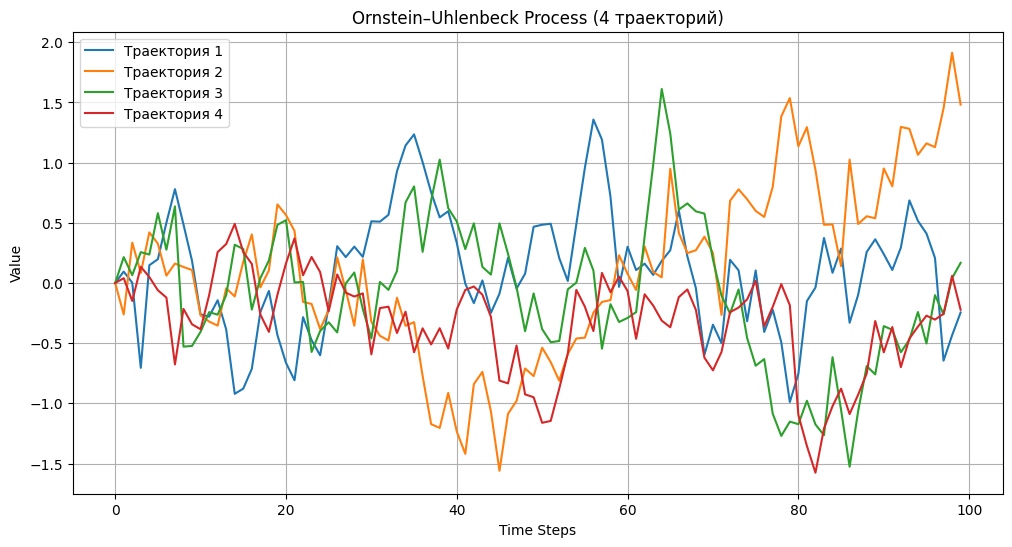

In [118]:
n_samples = 4
n_steps = 100
mu = 0.0
theta = 0.15
sigma = 0.3 
level = 7

X = generate_ou_process(n_samples, n_steps, mu, theta, sigma)

plt.figure(figsize=(12, 6))
for i in range(n_samples):
    plt.plot(X[i, :, 0], label=f"Траектория {i+1}")
plt.title("Ornstein–Uhlenbeck Process ({} траекторий)".format(n_samples))
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [73]:
def add_anomaly_to_random_vector(vectors, anomaly):
    random_index = np.random.randint(0, vectors.shape[0])
    vectors[random_index] += anomaly
    return vectors

In [78]:
np.random.randint(0, 3) > 1

False

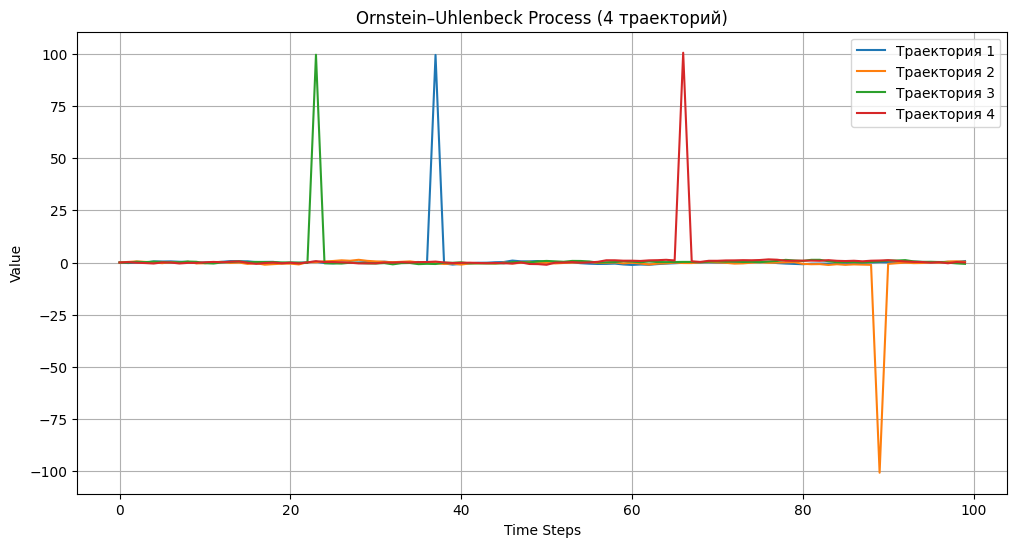

In [102]:
X_new = []
for i in range(n_samples):
    random_vec = 100
    if np.random.randint(0, 3) > 1:
        random_vec*= -1
    X_new.append(add_anomaly_to_random_vector((X[i, :, :]).copy(), [random_vec]))
X_new = np.array(X_new)
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    plt.plot(X_new[i, :, 0], label=f"Траектория {i+1}")
plt.title("Ornstein–Uhlenbeck Process ({} траекторий)".format(n_samples))
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [88]:
X.shape

(4, 100, 1)

In [67]:
(X[0, :, 0].reshape(-1, 1)).shape

(100, 1)

In [107]:
signatures = []
for i in range(n_samples):
    print(path)
    path = X[i, :, 0].reshape(-1, 1)
    signature = iisignature.sig(path, level)
    signatures.append(signature)
signatures = np.insert(signatures, 0, 1, axis=1)

[[ 0.00000000e+00]
 [ 1.91508218e-01]
 [-1.09946509e-01]
 [-2.63074726e-01]
 [-4.74056192e-01]
 [ 4.10804712e-02]
 [-1.98322364e-02]
 [-4.58017682e-01]
 [-1.82429608e-01]
 [-1.93619702e-01]
 [ 8.84801497e-02]
 [ 2.81939484e-01]
 [ 1.06122389e-01]
 [ 3.85895713e-01]
 [ 5.14553252e-01]
 [-1.73405262e-01]
 [-6.48732444e-01]
 [-2.49407889e-01]
 [-4.52710116e-02]
 [-3.54144088e-01]
 [-1.11660873e-01]
 [-4.32666236e-01]
 [ 3.51884250e-02]
 [ 6.39529144e-01]
 [ 2.38935845e-01]
 [ 2.18225198e-01]
 [ 7.52575691e-02]
 [-9.00284544e-02]
 [-4.36215975e-01]
 [-3.89225147e-01]
 [-4.13263620e-01]
 [ 1.92369195e-02]
 [-5.50982910e-02]
 [ 1.41430841e-01]
 [ 1.05839329e-02]
 [ 1.80005369e-01]
 [ 2.34571837e-01]
 [ 4.38097605e-01]
 [ 2.01213647e-02]
 [-2.50728100e-01]
 [-1.54840155e-01]
 [-8.97764333e-02]
 [-2.28328058e-01]
 [-3.39362368e-01]
 [-2.12375793e-01]
 [-3.57017768e-01]
 [-4.90608972e-01]
 [ 4.25268039e-02]
 [-7.14480486e-01]
 [-7.70434430e-01]
 [-1.08224257e+00]
 [-7.52276250e-02]
 [-1.5529734

In [108]:
signatures_with_anomaly = []
for i in range(n_samples):
    print(path)
    path = X_new[i, :, 0].reshape(-1, 1)
    signature = iisignature.sig(path, level)
    signatures_with_anomaly.append(signature)
signatures_with_anomaly = np.insert(signatures_with_anomaly, 0, 1, axis=1)

[[ 0.        ]
 [ 0.19150822]
 [-0.10994651]
 [-0.26307473]
 [-0.47405619]
 [ 0.04108047]
 [-0.01983224]
 [-0.45801768]
 [-0.18242961]
 [-0.1936197 ]
 [ 0.08848015]
 [ 0.28193948]
 [ 0.10612239]
 [ 0.38589571]
 [ 0.51455325]
 [-0.17340526]
 [-0.64873244]
 [-0.24940789]
 [-0.04527101]
 [-0.35414409]
 [-0.11166087]
 [-0.43266624]
 [ 0.03518842]
 [ 0.63952914]
 [ 0.23893584]
 [ 0.2182252 ]
 [ 0.07525757]
 [-0.09002845]
 [-0.43621597]
 [-0.38922515]
 [-0.41326362]
 [ 0.01923692]
 [-0.05509829]
 [ 0.14143084]
 [ 0.01058393]
 [ 0.18000537]
 [ 0.23457184]
 [ 0.43809761]
 [ 0.02012136]
 [-0.2507281 ]
 [-0.15484016]
 [-0.08977643]
 [-0.22832806]
 [-0.33936237]
 [-0.21237579]
 [-0.35701777]
 [-0.49060897]
 [ 0.0425268 ]
 [-0.71448049]
 [-0.77043443]
 [-1.08224257]
 [-0.07522762]
 [-0.01552973]
 [ 0.19753978]
 [-0.081393  ]
 [ 0.04784692]
 [ 0.31929761]
 [ 1.06739522]
 [ 1.0614807 ]
 [ 0.86212823]
 [ 0.86600071]
 [ 0.73803872]
 [ 1.02669102]
 [ 1.10560647]
 [ 1.29263474]
 [ 0.98121347]
 [ 0.52828

In [40]:
print(signatures)

[[ 1.00000000e+00 -5.50196968e-01  1.51358352e-01 -2.77589687e-02
   3.81822511e-03 -4.20155175e-04  3.85280172e-05 -3.02828547e-06]
 [ 1.00000000e+00  7.05783204e-01  2.49064966e-01  5.85952899e-02
   1.03388929e-02  1.45940339e-03  1.71670400e-04  1.73088693e-05]
 [ 1.00000000e+00 -4.63247614e-01  1.07299176e-01 -1.65686958e-02
   1.91885220e-03 -1.77780740e-04  1.37260840e-05 -9.08367950e-07]
 [ 1.00000000e+00  2.79651135e-01  3.91023785e-02  3.64500817e-03
   2.54832668e-04  1.42528489e-05  6.64304229e-07  2.65390616e-08]
 [ 1.00000000e+00  5.48366782e-01  1.50353064e-01  2.74828752e-02
   3.76767395e-03  4.13213448e-04  3.77654214e-05  2.95847180e-06]]


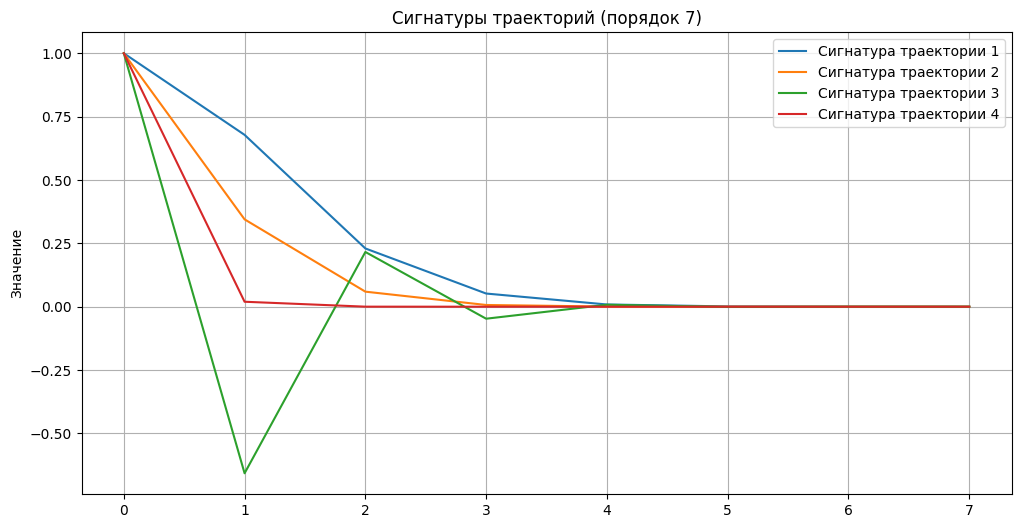

In [109]:
plt.figure(figsize=(12, 6))
for i, signature in enumerate(signatures):
    plt.plot(signature, label=f"Сигнатура траектории {i+1}")
plt.title("Сигнатуры траекторий (порядок {})".format(level))
plt.xlabel("")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.show()

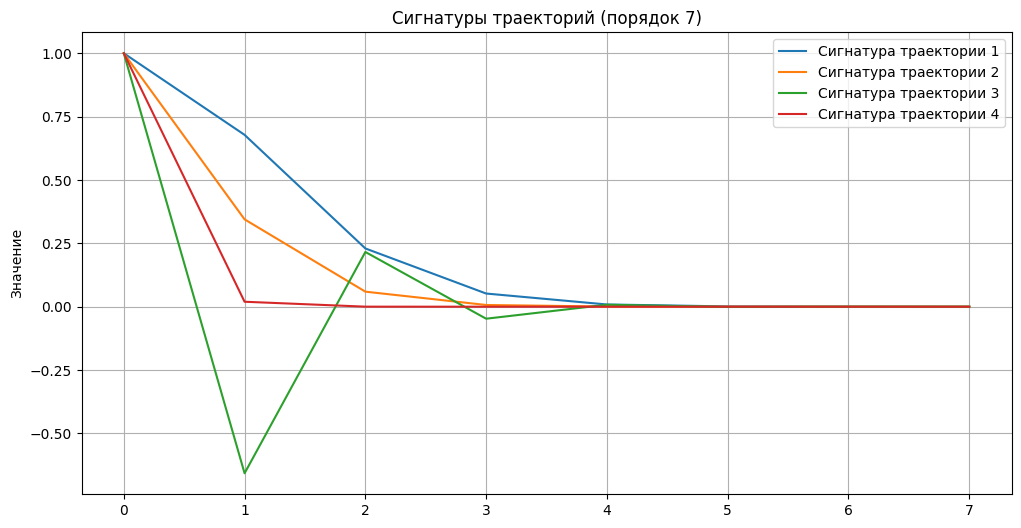

In [110]:
plt.figure(figsize=(12, 6))
for i, signature in enumerate(signatures_with_anomaly):
    plt.plot(signature, label=f"Сигнатура траектории {i+1}")
plt.title("Сигнатуры траекторий (порядок {})".format(level))
plt.xlabel("")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import copy

In [4]:
def generate_ou_process(n_samples, n_steps, mu=0, theta=0.15, sigma=0.3, anomaly=0):
    dt = 1.0
    timeline = np.zeros((n_steps))
    X = np.zeros((n_samples, n_steps))
    X[:, 0] = mu  # начальные условия
    for t in range(1, n_steps):
        dX = theta * (mu - X[:, t-1]) * dt + sigma * np.random.normal(size=n_samples) * np.sqrt(dt)
        X[:, t] = X[:, t-1] + dX
        timeline[t] = dt + timeline[t-1]
    if anomaly:
        for sample in range(0, n_samples) :
            anomaly_time = np.random.randint(0, n_steps)
            X[sample, anomaly_time] += np.random.choice([1, -1]) * anomaly # аномалия +- 5 сигм

    return X, timeline

In [4]:
def generate_sin_func(n_samples, n_periods, n_steps_in_period = 100, anomaly = False) :
    n_steps = n_periods * n_steps_in_period
    range_ = n_periods * 2 * np.pi    # range - длина генерации синуса
    dt = range_ / (n_steps)    # шаг по оси Ox
    timeline = np.zeros((n_steps))

    X = np.zeros((n_samples, n_steps))
    params = np.zeros((n_samples, 3))
    for i in range(0, n_samples):
        params[i][0] = np.random.rand()     # множитель синуса
        params[i][1] = 1      # множитель аргумента синуса. Стоит 1 чтобы период всегда был 2 пи
        params[i][2] = np.random.uniform(0, np.pi)  # сдвиг фазы

    for t in range(0, n_steps):
        X[:, t] = params[:, 0] * np.sin(dt * t * params[:, 1] + params[:, 2])
        timeline[t] = dt * t
    if (anomaly) :
        for sample in range(0, n_samples) :
            anomaly_time = np.random.randint(0, n_steps)
            X[sample, anomaly_time] = np.random.choice([1, -1]) * params[sample, 0]  # аномалия равная макс/мин знач. синуса

    return X, timeline


In [481]:
def generate_linear_func(n_samples, n_steps, range_ = 1.0, stationary_window = 5, anomaly = False) :
    dt = range_ / n_steps
    timeline = np.zeros((n_steps))
    X = np.zeros((n_samples, n_steps))
    params = np.zeros((n_samples))
    for i in range(0, n_samples):
        params[i] = np.random.rand()  # коэффициент наклона
    cur_decr = 0
    for t in range(0, n_steps):
        X[:, t] = params[:] * t
        if (t % stationary_window == 0) :      # stationary window - как период у синуса, для стационаризации
            cur_decr = copy.deepcopy((X[:, t]))
        X[:, t] -= cur_decr
        timeline[t] = t
    if (anomaly) :
        for sample in range(0, n_samples) :
            anomaly_time = np.random.randint(0, n_steps)
            X[sample, anomaly_time] += stationary_window * params[sample]  # аномалия + максимальное значение в "периоде"
    return X, timeline

In [39]:
n_samples = 4
n_steps = 100
mu = 0.0
theta = 0.15
sigma = 0.3 
level = 2

In [67]:
# Ornstein–Uhlenbeck process without anomaly
X_noanomaly, timeline = generate_ou_process(4, 100, mu, theta, sigma, anomaly=0)

In [68]:
X_noanomaly

array([[ 0.        , -0.21874467,  0.4107492 ,  0.99881998,  1.10468946,
         0.61408572,  0.98937538,  1.09324332,  0.3264969 ,  0.12870592,
         0.44995292,  0.91728277,  0.41118984,  0.83491323,  0.68392042,
         0.89799042,  1.26548641,  1.09474517,  0.58357847,  0.03054232,
        -0.03296738,  0.16176995,  1.0523307 ,  1.17236129,  1.60627301,
         1.49795567,  0.73233802,  0.8287798 ,  0.99031883,  0.46575205,
         0.95006031,  0.67958827,  0.61244974,  0.60662931,  0.46206635,
        -0.16556396,  0.01329417, -0.42047739, -0.6961924 , -0.91339916,
        -0.87151502, -0.25666005,  0.00746992, -0.11455562,  0.00857628,
         0.09671144,  0.3932608 ,  0.65493278,  0.81100674,  1.31525118,
         0.96036672,  0.92077859,  0.55749095,  0.85549679,  0.75236436,
         0.43950853,  0.81870711,  0.53576925,  0.14619996,  0.34443265,
         0.5615636 ,  0.76988831,  0.87413657,  1.1120328 ,  0.81704644,
         0.72450126,  0.43855103,  0.13984003,  0.3

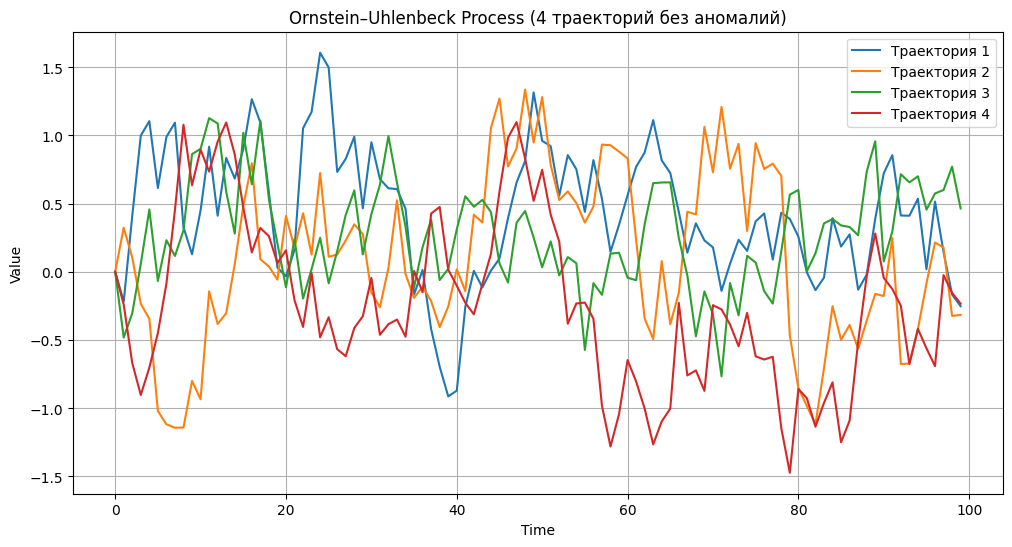

In [69]:
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    plt.plot(timeline, X_noanomaly[i, :], label=f"Траектория {i+1}")
plt.title("Ornstein–Uhlenbeck Process ({} траекторий без аномалий)".format(n_samples))
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [70]:
signatures_no_anomaly = []
for i in range(n_samples):
    signature = iisignature.sig(np.column_stack((timeline, X_noanomaly[i])), level)
    signatures_no_anomaly.append(signature)
signatures_no_anomaly = np.insert(signatures_no_anomaly, 0, 1, axis=1)

In [71]:
signatures_noanomaly

array([[ 1.00000000e+00,  9.90000000e+01, -3.46099437e-01,
         4.90050000e+03, -2.42168961e+01, -1.00469481e+01,
         5.98924103e-02],
       [ 1.00000000e+00,  9.90000000e+01, -1.69388347e-01,
         4.90050000e+03, -5.11305748e+00, -1.16563889e+01,
         1.43462060e-02],
       [ 1.00000000e+00,  9.90000000e+01,  1.79212703e-01,
         4.90050000e+03,  8.17730987e+00,  9.56474777e+00,
         1.60585965e-02],
       [ 1.00000000e+00,  9.90000000e+01, -3.99267565e-01,
         4.90050000e+03, -4.00213262e+01,  4.93837323e-01,
         7.97072941e-02]])

In [72]:
iisignature.siglength(2, 2)

6

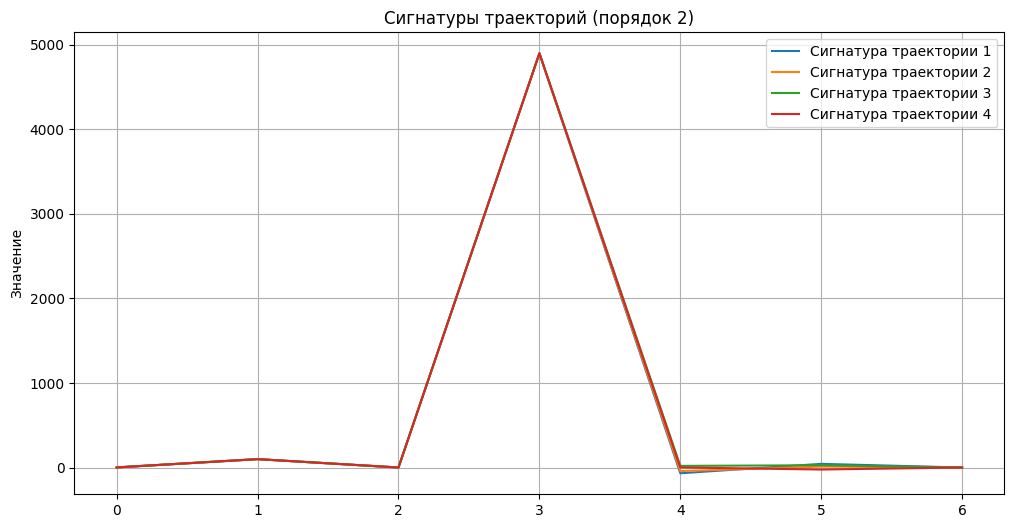

In [73]:
plt.figure(figsize=(12, 6))
for i, signature in enumerate(signatures_no_anomaly):
    plt.plot(signature, label=f"Сигнатура траектории {i+1}")
plt.title("Сигнатуры траекторий (порядок {})".format(level))
plt.xlabel("Индекс")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
def add_anomaly_to_random_vector(vectors, anomaly):
    random_index = np.random.randint(0, vectors.shape[0])
    vectors[random_index] += anomaly
    return vectors

In [76]:
# Ornstein–Uhlenbeck process with anomaly
# X_anomaly, timeline = generate_ou_process(4, 100, mu, theta, sigma, anomaly=5)
X_anomaly = X_noanomaly.copy()
for i in range(n_samples):
    X_anomaly[i, :] = add_anomaly_to_random_vector(X_anomaly[i, :], np.random.choice([1, -1]) * 5)

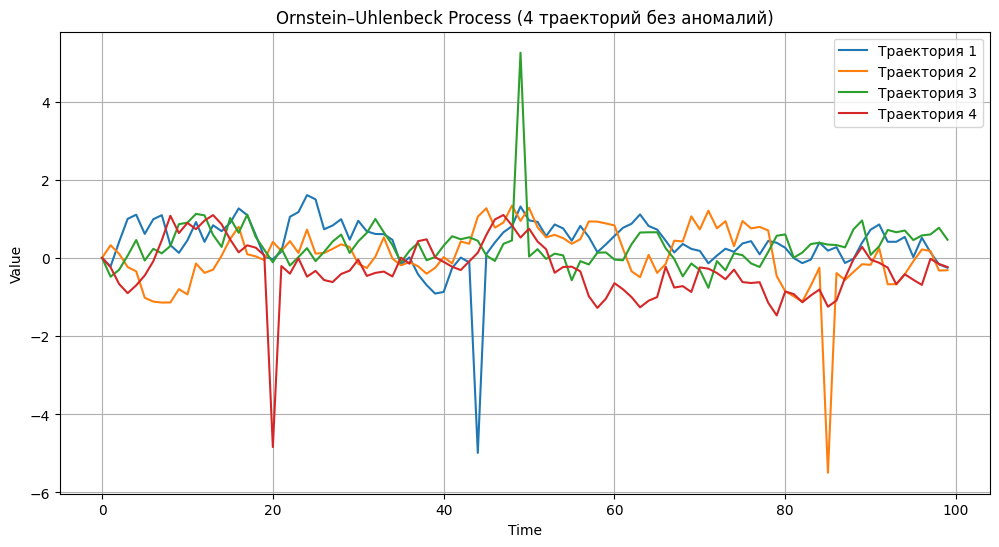

In [77]:
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    plt.plot(timeline, X_anomaly[i, :], label=f"Траектория {i+1}")
plt.title("Ornstein–Uhlenbeck Process ({} траекторий без аномалий)".format(n_samples))
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [79]:
signatures_with_anomaly = []
for i in range(n_samples):
    signature = iisignature.sig(np.column_stack((timeline, X_anomaly[i])), level)
    signatures_with_anomaly.append(signature)
signatures_with_anomaly = np.insert(signatures_with_anomaly, 0, 1, axis=1)

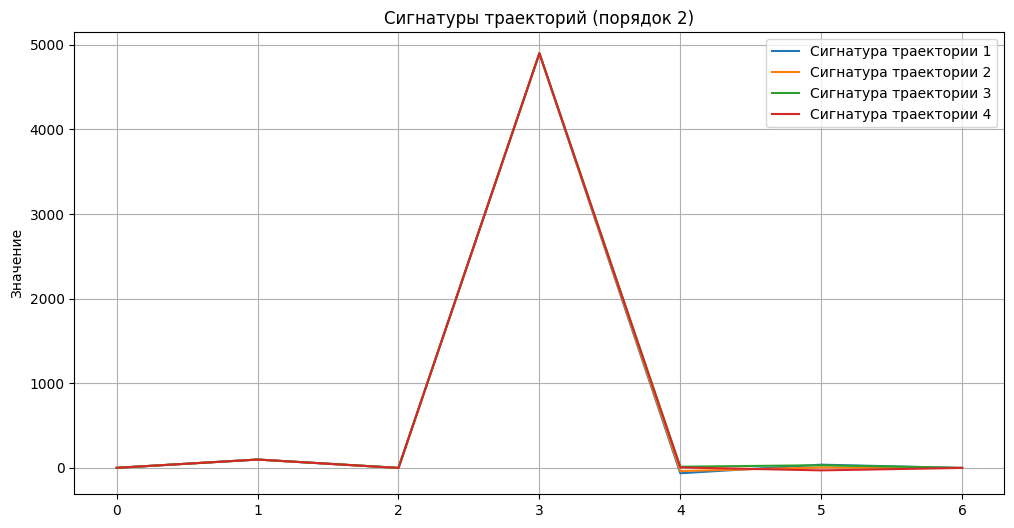

In [80]:
plt.figure(figsize=(12, 6))
for i, signature in enumerate(signatures_with_anomaly):
    plt.plot(signature, label=f"Сигнатура траектории {i+1}")
plt.title("Сигнатуры траекторий (порядок {})".format(level))
plt.xlabel("Индекс")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.show()

In [82]:
diff_signatures = [signatures_noanomaly[i] - signatures_with_anomaly[i] for i in range(len(signatures_with_anomaly))]
diff_signatures

[array([ 0.00000000e+00,  0.00000000e+00, -9.37959574e-02,  0.00000000e+00,
         3.90616754e+01, -4.83474752e+01,  2.80638873e-02]),
 array([  0.        ,   0.        ,   0.14652384,   0.        ,
         32.13075786, -17.62489733,  -0.03555405]),
 array([  0.        ,   0.        ,  -0.2850639 ,   0.        ,
         -6.02279337, -22.19853251,  -0.09171778]),
 array([  0.        ,   0.        ,  -0.1654818 ,   0.        ,
        -45.81838095,  29.43568272,   0.0523794 ])]

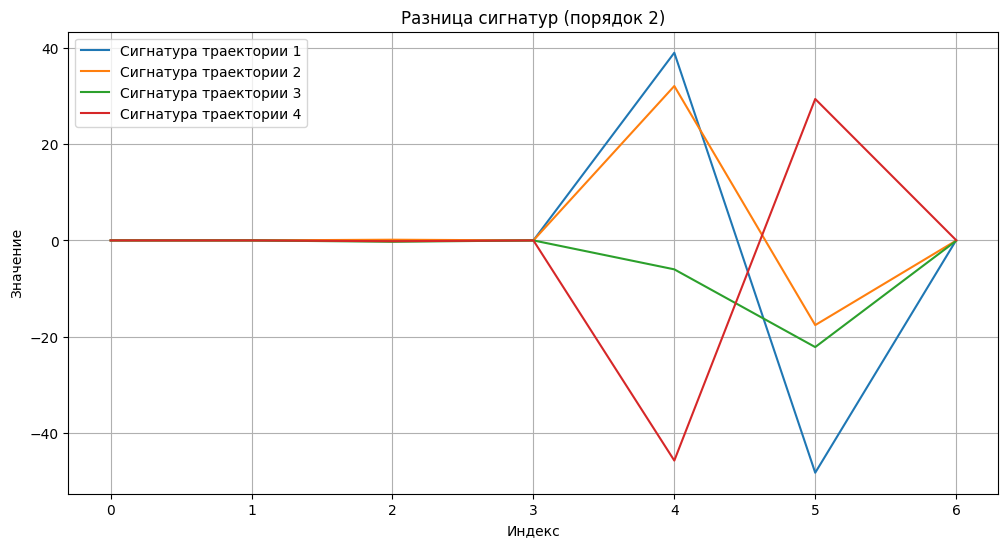

In [84]:
plt.figure(figsize=(12, 6))
for i, signature in enumerate(diff_signatures):
    plt.plot(signature, label=f"Сигнатура траектории {i+1}")
plt.title("Разница сигнатур (порядок {})".format(level))
plt.xlabel("Индекс")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [3]:
torch.cuda.is_available()

False

In [31]:
n_samples = 1000
n_steps = 100
mu = 0.0
theta = 0.15
sigma = 0.3
anomaly_level = 5 

In [32]:
X_noanomaly, _ = generate_ou_process(int(n_samples * 0.7), n_steps, mu, theta, sigma, anomaly=0)
X_anomaly, _ = generate_ou_process(int(n_samples * 0.3), n_steps, mu, theta, sigma, anomaly=anomaly_level)

y_noanomaly = np.zeros(X_noanomaly.shape[0])
y_anomaly = np.ones(X_anomaly.shape[0])

In [33]:
X = np.vstack((X_noanomaly, X_anomaly))
y = np.hstack((y_noanomaly, y_anomaly))

In [34]:
X.shape, y.shape

((1000, 100), (1000,))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 100), (200, 100), (800,), (200,))

In [9]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [10]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [11]:
class ThreeLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [12]:
input_size = n_steps
hidden_size = 64
output_size = 1
model = ThreeLayerNN(input_size, hidden_size, output_size)

In [17]:
criterion = nn.BCELoss()  # Бинарная кросс-энтропия
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Обучение модели
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        # Прямой проход
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Обратный проход и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.0018
Epoch [2/10], Loss: 0.0014
Epoch [3/10], Loss: 0.2140
Epoch [4/10], Loss: 0.0094
Epoch [5/10], Loss: 0.0037
Epoch [6/10], Loss: 0.0104
Epoch [7/10], Loss: 0.0001
Epoch [8/10], Loss: 0.0002
Epoch [9/10], Loss: 0.0001
Epoch [10/10], Loss: 0.0001


In [18]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        predicted = (outputs > 0.5).float()
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    accuracy = 100 * correct / total
    print(f"Точность на тестовой выборке: {accuracy:.2f}%")

Точность на тестовой выборке: 82.50%


In [ ]:
# С сигнатурами

In [87]:
n_samples = 1000
n_steps = 100
mu = 0.0
theta = 0.15
sigma = 0.3
anomaly_level = 5
level = 7

In [88]:
X_noanomaly, timeline = generate_ou_process(int(n_samples * 0.7), n_steps, mu, theta, sigma, anomaly=0)

signatures_no_anomaly = []
for i in range(X_noanomaly.shape[0]):
    signature = iisignature.sig(np.column_stack((timeline, X_noanomaly[i])), level)
    signatures_no_anomaly.append(signature)
signatures_no_anomaly = np.insert(signatures_no_anomaly, 0, 1, axis=1)

X_anomaly, timeline = generate_ou_process(int(n_samples * 0.3), n_steps, mu, theta, sigma, anomaly=anomaly_level)

signatures_with_anomaly = []
for i in range(X_anomaly.shape[0]):
    signature = iisignature.sig(np.column_stack((timeline, X_anomaly[i])), level)
    signatures_with_anomaly.append(signature)
signatures_with_anomaly = np.insert(signatures_with_anomaly, 0, 1, axis=1)

y_noanomaly = np.zeros(signatures_no_anomaly.shape[0])
y_anomaly = np.ones(signatures_with_anomaly.shape[0])

In [89]:
X = np.vstack((signatures_no_anomaly, signatures_with_anomaly))
y = np.hstack((y_noanomaly, y_anomaly))

In [90]:
X.shape, y.shape

((1000, 255), (1000,))

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 255), (200, 255), (800,), (200,))

In [93]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [94]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [95]:
class ThreeLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [96]:
iisignature.siglength(2, level)

254

In [97]:
input_size = 255
hidden_size = 64
output_size = 1
model = ThreeLayerNN(input_size, hidden_size, output_size)

In [98]:
criterion = nn.BCELoss()  # Бинарная кросс-энтропия
optimizer = optim.Adam(model.parameters(), lr=0.003)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/50], Loss: 56.2500
Epoch [2/50], Loss: 50.0000
Epoch [3/50], Loss: 68.7500
Epoch [4/50], Loss: 75.0000
Epoch [5/50], Loss: 71.8750
Epoch [6/50], Loss: 71.8750
Epoch [7/50], Loss: 71.8750
Epoch [8/50], Loss: 75.0000
Epoch [9/50], Loss: 71.8750
Epoch [10/50], Loss: 75.0000
Epoch [11/50], Loss: 71.8750
Epoch [12/50], Loss: 68.7500
Epoch [13/50], Loss: 65.6250
Epoch [14/50], Loss: 65.6250
Epoch [15/50], Loss: 62.5000
Epoch [16/50], Loss: 75.0000
Epoch [17/50], Loss: 71.8750
Epoch [18/50], Loss: 81.2500
Epoch [19/50], Loss: 59.3750
Epoch [20/50], Loss: 75.0000
Epoch [21/50], Loss: 65.6250
Epoch [22/50], Loss: 71.8750
Epoch [23/50], Loss: 56.2500
Epoch [24/50], Loss: 46.8750
Epoch [25/50], Loss: 75.0000
Epoch [26/50], Loss: 71.8750
Epoch [27/50], Loss: 75.0000
Epoch [28/50], Loss: 68.7500
Epoch [29/50], Loss: 71.8750
Epoch [30/50], Loss: 71.8750
Epoch [31/50], Loss: 81.2500
Epoch [32/50], Loss: 56.2500
Epoch [33/50], Loss: 81.2500
Epoch [34/50], Loss: 75.0000
Epoch [35/50], Loss: 65

In [99]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        predicted = (outputs > 0.5).float()
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    accuracy = 100 * correct / total
    print(f"Точность на тестовой выборке: {accuracy:.2f}%")

Точность на тестовой выборке: 30.00%


In [379]:
def calc_sig_window(window, path, timeline):
    # assert(len(path) % window == 0)
    mean_sig = np.zeros(iisignature.siglength(dimension, level)) 
    for i in range(int(len(path)/window)):
        last_border = (i+1)*window
        if last_border > len(path):
            last_border = len(path)
        mean_sig += iisignature.sig(np.column_stack((timeline[i*window:(i+1)*window], path[i*window:(i+1)*window ])), level)
    mean_sig /= int(len(path)/window)
    return mean_sig

In [380]:
n_samples = 1000
n_steps = 150
mu = 0.0
theta = 0.15
sigma = 0.3
anomaly_level = 5
level = 7
dimension = 2

In [381]:
window = 15

In [382]:
np.array(iisignature.sig(np.column_stack((timeline[0:20], X_noanomaly[0, 0:20])), level)).shape

(254,)

In [383]:
X_noanomaly, timeline = generate_ou_process(int(1), n_steps, mu, theta, sigma, anomaly=0)
print(X_noanomaly.shape)

(1, 150)


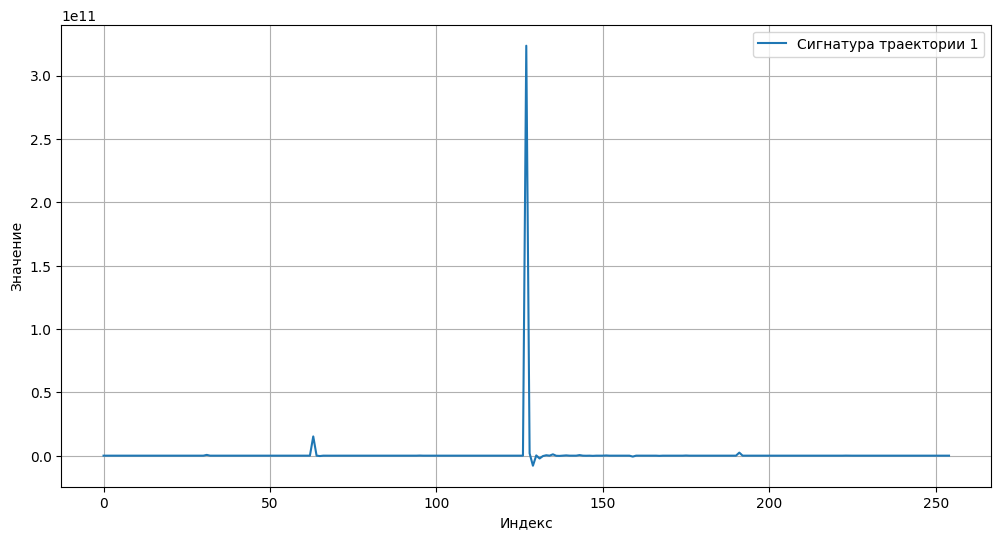

In [384]:
signatures = []
signature = iisignature.sig(np.column_stack((timeline, X_noanomaly[0])), level)
signatures.append(signature)
signatures = np.insert(signatures, 0, 1, axis=1)

plt.figure(figsize=(12, 6))
for i, signature in enumerate(signatures):
    plt.plot(signature, label=f"Сигнатура траектории {i+1}")
plt.title("")
# plt.ylim(-25*10**3,175*10**3)
plt.xlabel("Индекс")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.show()

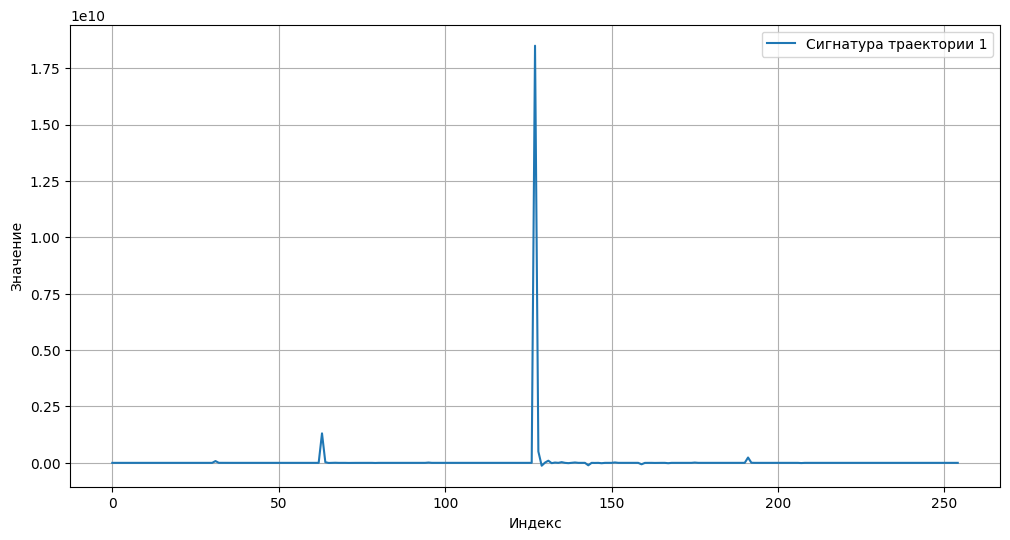

In [385]:
signatures = []
# signature = iisignature.sig(np.column_stack((timeline, X_noanomaly[0])), level)
# signatures.append(signature)
signature = calc_sig_window(100, X_noanomaly[0], timeline)
signatures.append(signature)
signatures = np.insert(signatures, 0, 1, axis=1)

plt.figure(figsize=(12, 6))
for i, signature in enumerate(signatures):
    plt.plot(signature, label=f"Сигнатура траектории {i+1}")
plt.title("")
# plt.ylim(-25*10**3,175*10**3)
plt.xlabel("Индекс")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.show()

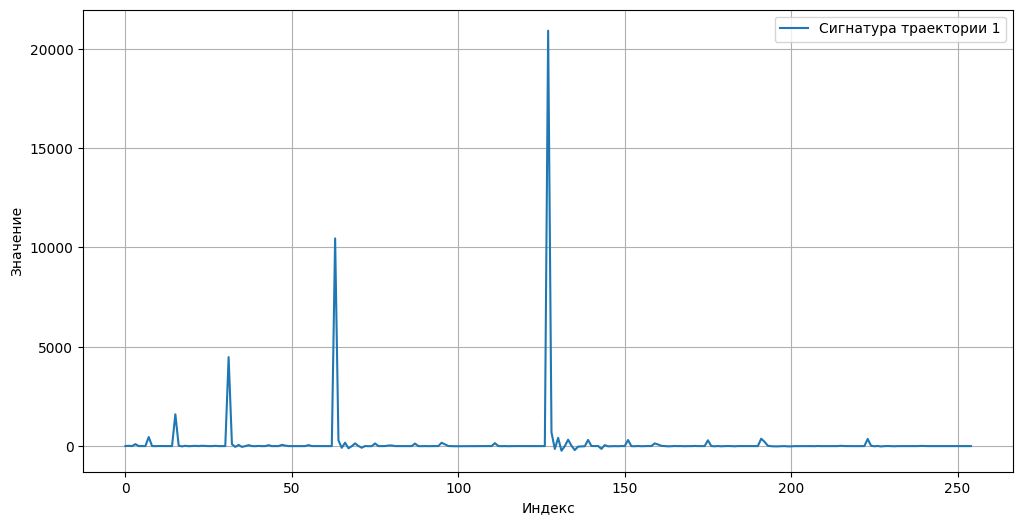

In [386]:
signatures = []
# signature = iisignature.sig(np.column_stack((timeline, X_noanomaly[0])), level)
# signatures.append(signature)
signature = calc_sig_window(window, X_noanomaly[0], timeline)
signatures.append(signature)
signatures = np.insert(signatures, 0, 1, axis=1)

plt.figure(figsize=(12, 6))
for i, signature in enumerate(signatures):
    plt.plot(signature, label=f"Сигнатура траектории {i+1}")
plt.title("")
# plt.ylim(-25*10**3,175*10**3)
plt.xlabel("Индекс")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.show()

In [436]:
n_samples = 10000
n_steps = 1000
mu = 0.0
theta = 0.15
sigma = 0.3
anomaly_level = 5
level = 7
dimension = 2

In [437]:
np.random.seed(42)

In [438]:
window = 10

In [439]:
X_noanomaly, timeline = generate_ou_process(int(n_samples * 0.7), n_steps, mu, theta, sigma, anomaly=0)

signatures_no_anomaly = []
for i in range(X_noanomaly.shape[0]):
    signature = calc_sig_window(window, X_noanomaly[i], timeline)
    signatures_no_anomaly.append(signature)
signatures_no_anomaly = np.insert(signatures_no_anomaly, 0, 1, axis=1)

X_anomaly, timeline = generate_ou_process(int(n_samples * 0.3), n_steps, mu, theta, sigma, anomaly=anomaly_level)

signatures_with_anomaly = []
for i in range(X_anomaly.shape[0]):
    signature = calc_sig_window(window, X_anomaly[i], timeline)
    signatures_with_anomaly.append(signature)
signatures_with_anomaly = np.insert(signatures_with_anomaly, 0, 1, axis=1)

y_noanomaly = np.zeros(signatures_no_anomaly.shape[0])
y_anomaly = np.ones(signatures_with_anomaly.shape[0])

In [440]:
X = np.vstack((signatures_no_anomaly, signatures_with_anomaly))
y = np.hstack((y_noanomaly, y_anomaly))

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [442]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [443]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [444]:
class ThreeLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [445]:
input_size = 1 + iisignature.siglength(dimension, level)
hidden_size = 64
output_size = 1
model = ThreeLayerNN(input_size, hidden_size, output_size)

In [446]:
criterion = nn.BCELoss()  # Бинарная кросс-энтропия
optimizer = optim.Adam(model.parameters(), lr=0.003)

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/20], Loss: 0.3744
Epoch [2/20], Loss: 0.0018
Epoch [3/20], Loss: 0.0001
Epoch [4/20], Loss: 0.0000
Epoch [5/20], Loss: 0.0000
Epoch [6/20], Loss: 0.0000
Epoch [7/20], Loss: 0.0000
Epoch [8/20], Loss: 0.0000
Epoch [9/20], Loss: 0.0000
Epoch [10/20], Loss: 0.0000
Epoch [11/20], Loss: 0.0001
Epoch [12/20], Loss: 0.0000
Epoch [13/20], Loss: 0.0000
Epoch [14/20], Loss: 0.0000
Epoch [15/20], Loss: 0.0000
Epoch [16/20], Loss: 0.0000
Epoch [17/20], Loss: 0.0000
Epoch [18/20], Loss: 0.0000
Epoch [19/20], Loss: 0.0000
Epoch [20/20], Loss: 0.0000


In [447]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        predicted = (outputs > 0.5).float()
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    accuracy = 100 * correct / total
    print(f"Точность на тестовой выборке: {accuracy:.2f}%")

Точность на тестовой выборке: 100.00%


In [462]:
model_params = {
    "n_samples": 10000,
    "n_steps": 1000,
    "mu": 0.0,
    "theta": 0.15,
    "sigma": 0.3,
    "anomaly_level": 5,
    "level": 7,
    "dimension": 2
}


In [472]:
def train_nn_window(model_params, window):
    np.random.seed(42)
    torch.manual_seed(42)

    def calc_sig_window(window, path, timeline, dimension, level):
        mean_sig = np.zeros(iisignature.siglength(dimension, level))
        for i in range(int(len(path) / window)):
            last_border = (i + 1) * window
            if last_border > len(path):
                last_border = len(path)
            mean_sig += iisignature.sig(np.column_stack((timeline[i * window:last_border], path[i * window:last_border])), level)
        mean_sig /= int(len(path) / window)
        return mean_sig

    n_samples = model_params["n_samples"]
    n_steps = model_params["n_steps"]
    mu = model_params["mu"]
    theta = model_params["theta"]
    sigma = model_params["sigma"]
    anomaly_level = model_params["anomaly_level"]
    dimension = model_params["dimension"]
    level = model_params["level"]

    X_noanomaly, _ = generate_ou_process(int(n_samples * 0.7), n_steps, mu, theta, sigma, anomaly=0)
    X_anomaly, _ = generate_ou_process(int(n_samples * 0.3), n_steps, mu, theta, sigma, anomaly=anomaly_level)
    
    y_noanomaly = np.zeros(X_noanomaly.shape[0])
    y_anomaly = np.ones(X_anomaly.shape[0])
    X = np.vstack((X_noanomaly, X_anomaly))
    y = np.hstack((y_noanomaly, y_anomaly))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    class ThreeLayerNN(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(ThreeLayerNN, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.fc2 = nn.Linear(hidden_size, hidden_size)
            self.fc3 = nn.Linear(hidden_size, output_size)
            self.relu = nn.ReLU()
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = self.relu(self.fc1(x))
            x = self.relu(self.fc2(x))
            x = self.sigmoid(self.fc3(x))
            return x

    input_size = 1000
    hidden_size = 64
    output_size = 1
    model = ThreeLayerNN(input_size, hidden_size, output_size)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)

    num_epochs = 20
    best_accuracy = 0
    best_epoch = 0
    loss_best_accuracy = 10**10
    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Тестирование модели
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for batch_X, batch_y in test_loader:
                outputs = model(batch_X)
                predicted = (outputs > 0.5).float()
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()

            accuracy = 100 * correct / total
            if loss_best_accuracy > loss:
                best_accuracy = accuracy
                best_epoch = epoch
                loss_best_accuracy = loss

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

    print(f"Лучшая точность: {best_accuracy:.2f}% на эпохе {best_epoch+1}")
    return best_accuracy


In [473]:
np.random.seed(42)
torch.manual_seed(42)

Окно: 2
Epoch [1/20], Loss: 0.5504, Accuracy: 70.00%
Epoch [2/20], Loss: 0.5390, Accuracy: 70.00%
Epoch [3/20], Loss: 0.6559, Accuracy: 69.05%
Epoch [4/20], Loss: 0.5194, Accuracy: 64.30%
Epoch [5/20], Loss: 0.5156, Accuracy: 60.70%
Epoch [6/20], Loss: 0.4075, Accuracy: 57.55%
Epoch [7/20], Loss: 0.2753, Accuracy: 56.85%
Epoch [8/20], Loss: 0.4094, Accuracy: 58.90%
Epoch [9/20], Loss: 0.0587, Accuracy: 59.80%
Epoch [10/20], Loss: 0.1006, Accuracy: 56.95%
Epoch [11/20], Loss: 0.0132, Accuracy: 61.30%
Epoch [12/20], Loss: 0.0817, Accuracy: 59.85%
Epoch [13/20], Loss: 0.0746, Accuracy: 58.05%
Epoch [14/20], Loss: 0.0104, Accuracy: 57.40%
Epoch [15/20], Loss: 0.0323, Accuracy: 59.30%
Epoch [16/20], Loss: 0.0091, Accuracy: 59.15%
Epoch [17/20], Loss: 0.0185, Accuracy: 58.05%
Epoch [18/20], Loss: 0.2657, Accuracy: 56.55%
Epoch [19/20], Loss: 0.2233, Accuracy: 54.55%
Epoch [20/20], Loss: 0.0312, Accuracy: 55.80%
Лучшая точность: 59.15% на эпохе 16
Окно: 3
Epoch [1/20], Loss: 0.5504, Accuracy:

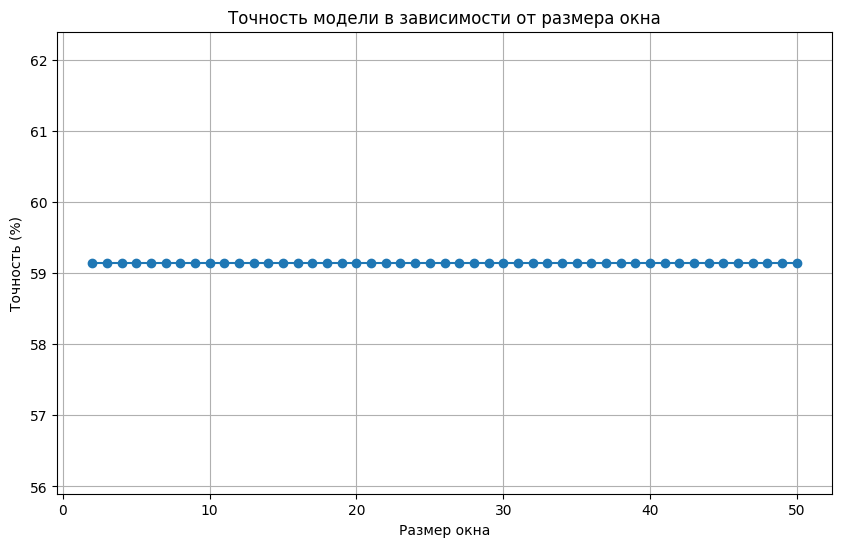

In [474]:
# Обучаем модель для разных размеров окон и строим график
window_sizes = range(2, 51)
accuracies_no_anomaly = []

for window in window_sizes:
    print(f"Окно: {window}")
    accuracy = train_nn_window(model_params, window)
    accuracies_no_anomaly.append(accuracy)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, accuracies_no_anomaly, marker='o')
plt.title("Точность модели в зависимости от размера окна")
plt.xlabel("Размер окна")
plt.ylabel("Точность (%)")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(window_sizes[:20], accuracies_no_anomaly[:20], marker='o')
plt.title("Точность модели в зависимости от размера окна")
plt.xlabel("Размер окна")
plt.ylabel("Точность (%)")
plt.grid(True)
plt.show()

In [448]:
model_params = {
    "n_samples": 10000,
    "n_steps": 1000,
    "mu": 0.0,
    "theta": 0.15,
    "sigma": 0.3,
    "anomaly_level": 5,
    "level": 7,
    "dimension": 2
}


In [449]:
np.random.seed(42)
torch.manual_seed(42)

In [452]:
def train_nn_window(model_params, window):
    np.random.seed(42)
    torch.manual_seed(42)

    def calc_sig_window(window, path, timeline, dimension, level):
        mean_sig = np.zeros(iisignature.siglength(dimension, level))
        for i in range(int(len(path) / window)):
            last_border = (i + 1) * window
            if last_border > len(path):
                last_border = len(path)
            mean_sig += iisignature.sig(np.column_stack((timeline[i * window:last_border], path[i * window:last_border])), level)
        mean_sig /= int(len(path) / window)
        return mean_sig

    n_samples = model_params["n_samples"]
    n_steps = model_params["n_steps"]
    mu = model_params["mu"]
    theta = model_params["theta"]
    sigma = model_params["sigma"]
    anomaly_level = model_params["anomaly_level"]
    dimension = model_params["dimension"]
    level = model_params["level"]

    X_noanomaly, timeline = generate_ou_process(int(n_samples * 0.7), n_steps, mu, theta, sigma, anomaly=0)
    X_anomaly, timeline = generate_ou_process(int(n_samples * 0.3), n_steps, mu, theta, sigma, anomaly=anomaly_level)

    signatures_no_anomaly = []
    for i in range(X_noanomaly.shape[0]):
        signature = calc_sig_window(window, X_noanomaly[i], timeline, dimension, level)
        signatures_no_anomaly.append(signature)
    signatures_no_anomaly = np.insert(signatures_no_anomaly, 0, 1, axis=1)

    signatures_with_anomaly = []
    for i in range(X_anomaly.shape[0]):
        signature = calc_sig_window(window, X_anomaly[i], timeline, dimension, level)
        signatures_with_anomaly.append(signature)
    signatures_with_anomaly = np.insert(signatures_with_anomaly, 0, 1, axis=1)

    y_noanomaly = np.zeros(signatures_no_anomaly.shape[0])
    y_anomaly = np.ones(signatures_with_anomaly.shape[0])
    X = np.vstack((signatures_no_anomaly, signatures_with_anomaly))
    y = np.hstack((y_noanomaly, y_anomaly))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    class ThreeLayerNN(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(ThreeLayerNN, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.fc2 = nn.Linear(hidden_size, hidden_size)
            self.fc3 = nn.Linear(hidden_size, output_size)
            self.relu = nn.ReLU()
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = self.relu(self.fc1(x))
            x = self.relu(self.fc2(x))
            x = self.sigmoid(self.fc3(x))
            return x

    input_size = 1 + iisignature.siglength(dimension, level)
    hidden_size = 64
    output_size = 1
    model = ThreeLayerNN(input_size, hidden_size, output_size)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)

    num_epochs = 20
    best_accuracy = 0
    best_epoch = 0
    loss_best_accuracy = 10**10
    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Тестирование модели
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for batch_X, batch_y in test_loader:
                outputs = model(batch_X)
                predicted = (outputs > 0.5).float()
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()

            accuracy = 100 * correct / total
            if loss_best_accuracy > loss:
                best_accuracy = accuracy
                best_epoch = epoch
                loss_best_accuracy = loss

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

    print(f"Лучшая точность: {best_accuracy:.2f}% на эпохе {best_epoch+1}")
    return best_accuracy


Окно: 2
Epoch [1/20], Loss: 0.0025, Accuracy: 100.00%
Epoch [2/20], Loss: 0.0007, Accuracy: 100.00%
Epoch [3/20], Loss: 0.0002, Accuracy: 100.00%
Epoch [4/20], Loss: 0.0003, Accuracy: 100.00%
Epoch [5/20], Loss: 0.0001, Accuracy: 100.00%
Epoch [6/20], Loss: 0.0001, Accuracy: 100.00%
Epoch [7/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [8/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [9/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [10/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [11/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [12/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [13/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [14/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [15/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [16/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [17/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [18/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [19/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [20/20], Loss: 0.0000, Accuracy: 100.00%
Лучшая точность: 100.00% на эпохе 1
Окно: 3
Epoch [1/20], Los

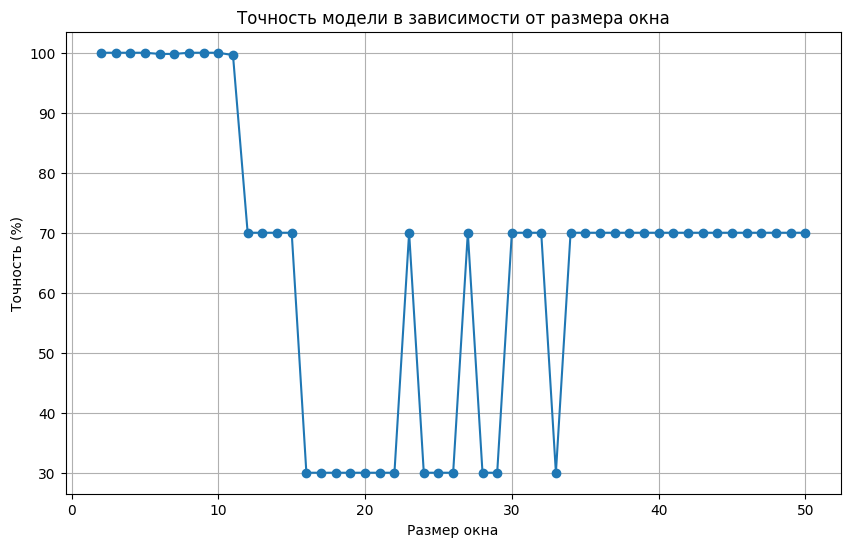

In [453]:
# Обучаем модель для разных размеров окон и строим график
window_sizes = range(2, 51)
accuracies = []

for window in window_sizes:
    print(f"Окно: {window}")
    accuracy = train_nn_window(model_params, window)
    accuracies.append(accuracy)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, accuracies, marker='o')
plt.title("Точность модели в зависимости от размера окна")
plt.xlabel("Размер окна")
plt.ylabel("Точность (%)")
plt.grid(True)
plt.show()

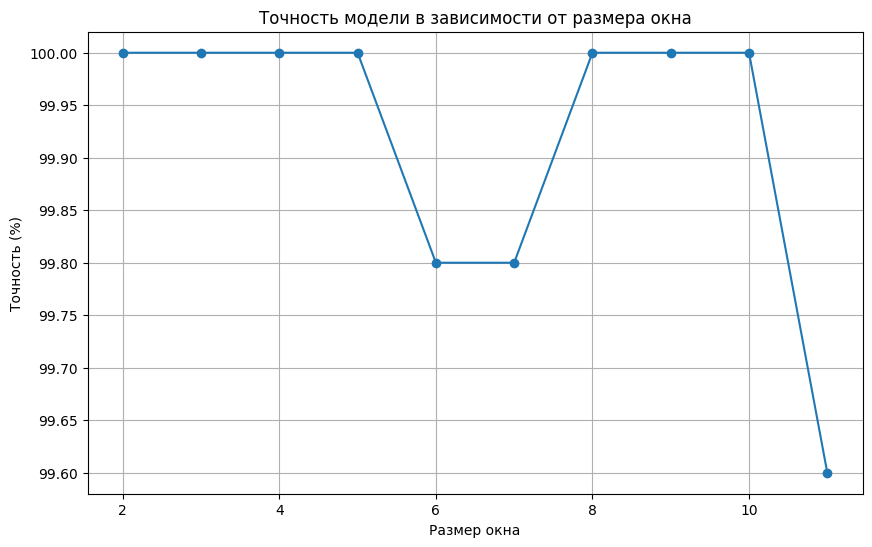

In [461]:
plt.figure(figsize=(10, 6))
plt.plot(window_sizes[:10], accuracies[:10], marker='o')
plt.title("Точность модели в зависимости от размера окна")
plt.xlabel("Размер окна")
plt.ylabel("Точность (%)")
plt.grid(True)
plt.show()

In [478]:
model_params = {
    "n_samples": 10000,
    "n_steps": 1000,
    "mu": 0.0,
    "theta": 0.15,
    "sigma": 0.3,
    "anomaly_level": 5,
    "level": 7,
    "dimension": 2
}


In [479]:
def train_nn_window(model_params, window):
    np.random.seed(42)
    torch.manual_seed(42)

    def calc_sig_window(window, path, timeline, dimension, level):
        mean_sig = np.zeros(iisignature.siglength(dimension, level))
        for i in range(int(len(path) / window)):
            last_border = (i + 1) * window
            if last_border > len(path):
                last_border = len(path)
            mean_sig += iisignature.sig(np.column_stack((timeline[i * window:last_border], path[i * window:last_border])), level)
        mean_sig /= int(len(path) / window)
        return mean_sig

    n_samples = model_params["n_samples"]
    n_steps = model_params["n_steps"]
    mu = model_params["mu"]
    theta = model_params["theta"]
    sigma = model_params["sigma"]
    anomaly_level = model_params["anomaly_level"]
    dimension = model_params["dimension"]
    level = model_params["level"]

    X_noanomaly, _ = generate_linear_func(int(n_samples * 0.7), n_steps)
    X_anomaly, _ = generate_linear_func(int(n_samples * 0.3), n_steps, anomaly=True)
    
    y_noanomaly = np.zeros(X_noanomaly.shape[0])
    y_anomaly = np.ones(X_anomaly.shape[0])
    X = np.vstack((X_noanomaly, X_anomaly))
    y = np.hstack((y_noanomaly, y_anomaly))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    class ThreeLayerNN(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(ThreeLayerNN, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.fc2 = nn.Linear(hidden_size, hidden_size)
            self.fc3 = nn.Linear(hidden_size, output_size)
            self.relu = nn.ReLU()
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = self.relu(self.fc1(x))
            x = self.relu(self.fc2(x))
            x = self.sigmoid(self.fc3(x))
            return x

    input_size = 1000
    hidden_size = 64
    output_size = 1
    model = ThreeLayerNN(input_size, hidden_size, output_size)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)

    num_epochs = 20
    best_accuracy = 0
    best_epoch = 0
    loss_best_accuracy = 10**10
    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Тестирование модели
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for batch_X, batch_y in test_loader:
                outputs = model(batch_X)
                predicted = (outputs > 0.5).float()
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()

            accuracy = 100 * correct / total
            if loss_best_accuracy > loss:
                best_accuracy = accuracy
                best_epoch = epoch
                loss_best_accuracy = loss

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

    print(f"Лучшая точность: {best_accuracy:.2f}% на эпохе {best_epoch+1}")
    return best_accuracy


Окно: 5
Epoch [1/20], Loss: 0.5467, Accuracy: 70.00%
Epoch [2/20], Loss: 0.5664, Accuracy: 70.00%
Epoch [3/20], Loss: 0.7147, Accuracy: 70.00%
Epoch [4/20], Loss: 0.6235, Accuracy: 70.00%
Epoch [5/20], Loss: 0.6708, Accuracy: 70.00%
Epoch [6/20], Loss: 0.7152, Accuracy: 70.00%
Epoch [7/20], Loss: 0.5714, Accuracy: 70.00%
Epoch [8/20], Loss: 0.7581, Accuracy: 70.00%
Epoch [9/20], Loss: 0.5363, Accuracy: 70.00%
Epoch [10/20], Loss: 0.5406, Accuracy: 70.00%
Epoch [11/20], Loss: 0.5457, Accuracy: 70.00%
Epoch [12/20], Loss: 0.6505, Accuracy: 70.00%
Epoch [13/20], Loss: 0.6556, Accuracy: 70.00%
Epoch [14/20], Loss: 0.6221, Accuracy: 70.00%
Epoch [15/20], Loss: 0.6459, Accuracy: 70.00%
Epoch [16/20], Loss: 0.6471, Accuracy: 70.00%
Epoch [17/20], Loss: 0.6488, Accuracy: 70.00%
Epoch [18/20], Loss: 0.6729, Accuracy: 70.00%
Epoch [19/20], Loss: 0.5645, Accuracy: 70.00%
Epoch [20/20], Loss: 0.5700, Accuracy: 70.00%
Лучшая точность: 70.00% на эпохе 9
Окно: 10
Epoch [1/20], Loss: 0.5467, Accuracy:

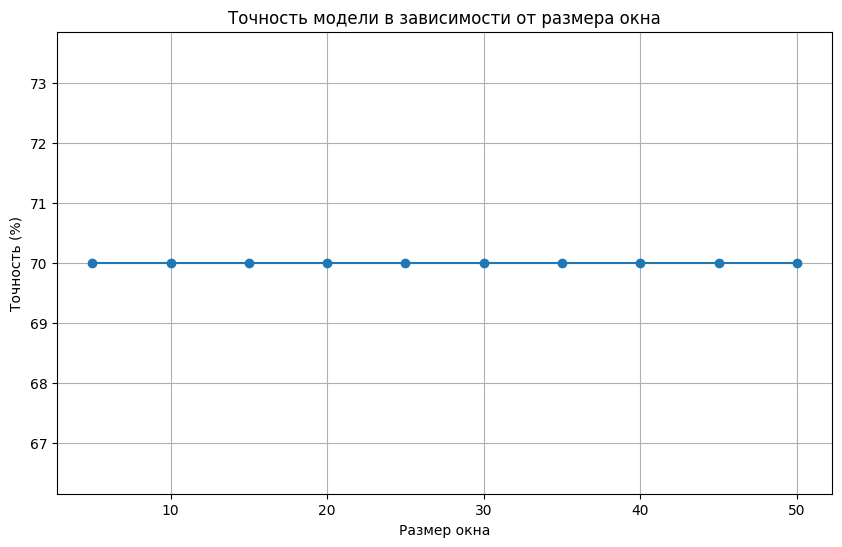

In [483]:
# Обучаем модель для разных размеров окон и строим график
window_sizes = range(5, 51, 5)
accuracies = []
import copy
for window in window_sizes:
    print(f"Окно: {window}")
    accuracy = train_nn_window(model_params, window)
    accuracies.append(accuracy)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, accuracies, marker='o')
plt.title("Точность модели в зависимости от размера окна")
plt.xlabel("Размер окна")
plt.ylabel("Точность (%)")
plt.grid(True)
plt.show()

In [484]:
model_params = {
    "n_samples": 10000,
    "n_steps": 1000,
    "mu": 0.0,
    "theta": 0.15,
    "sigma": 0.3,
    "anomaly_level": 5,
    "level": 7,
    "dimension": 2
}


In [485]:
def train_nn_window(model_params, window):
    np.random.seed(42)
    torch.manual_seed(42)

    def calc_sig_window(window, path, timeline, dimension, level):
        mean_sig = np.zeros(iisignature.siglength(dimension, level))
        for i in range(int(len(path) / window)):
            last_border = (i + 1) * window
            if last_border > len(path):
                last_border = len(path)
            mean_sig += iisignature.sig(np.column_stack((timeline[i * window:last_border], path[i * window:last_border])), level)
        mean_sig /= int(len(path) / window)
        return mean_sig

    n_samples = model_params["n_samples"]
    n_steps = model_params["n_steps"]
    mu = model_params["mu"]
    theta = model_params["theta"]
    sigma = model_params["sigma"]
    anomaly_level = model_params["anomaly_level"]
    dimension = model_params["dimension"]
    level = model_params["level"]

    X_noanomaly, timeline = generate_linear_func(int(n_samples * 0.7), n_steps)
    X_anomaly, timeline = generate_linear_func(int(n_samples * 0.3), n_steps, anomaly=True)

    signatures_no_anomaly = []
    for i in range(X_noanomaly.shape[0]):
        signature = calc_sig_window(window, X_noanomaly[i], timeline, dimension, level)
        signatures_no_anomaly.append(signature)
    signatures_no_anomaly = np.insert(signatures_no_anomaly, 0, 1, axis=1)

    signatures_with_anomaly = []
    for i in range(X_anomaly.shape[0]):
        signature = calc_sig_window(window, X_anomaly[i], timeline, dimension, level)
        signatures_with_anomaly.append(signature)
    signatures_with_anomaly = np.insert(signatures_with_anomaly, 0, 1, axis=1)

    y_noanomaly = np.zeros(signatures_no_anomaly.shape[0])
    y_anomaly = np.ones(signatures_with_anomaly.shape[0])
    X = np.vstack((signatures_no_anomaly, signatures_with_anomaly))
    y = np.hstack((y_noanomaly, y_anomaly))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    class ThreeLayerNN(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(ThreeLayerNN, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.fc2 = nn.Linear(hidden_size, hidden_size)
            self.fc3 = nn.Linear(hidden_size, output_size)
            self.relu = nn.ReLU()
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = self.relu(self.fc1(x))
            x = self.relu(self.fc2(x))
            x = self.sigmoid(self.fc3(x))
            return x

    input_size = 1 + iisignature.siglength(dimension, level)
    hidden_size = 64
    output_size = 1
    model = ThreeLayerNN(input_size, hidden_size, output_size)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)

    num_epochs = 20
    best_accuracy = 0
    best_epoch = 0
    loss_best_accuracy = 10**10
    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Тестирование модели
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for batch_X, batch_y in test_loader:
                outputs = model(batch_X)
                predicted = (outputs > 0.5).float()
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()

            accuracy = 100 * correct / total
            if loss_best_accuracy > loss:
                best_accuracy = accuracy
                best_epoch = epoch
                loss_best_accuracy = loss

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

    print(f"Лучшая точность: {best_accuracy:.2f}% на эпохе {best_epoch+1}")
    return best_accuracy


Окно: 5
Epoch [1/20], Loss: 0.7135, Accuracy: 70.00%
Epoch [2/20], Loss: 0.5097, Accuracy: 70.00%
Epoch [3/20], Loss: 0.5565, Accuracy: 70.00%
Epoch [4/20], Loss: 0.5333, Accuracy: 71.20%
Epoch [5/20], Loss: 0.3558, Accuracy: 76.90%
Epoch [6/20], Loss: 0.4055, Accuracy: 81.15%
Epoch [7/20], Loss: 0.5059, Accuracy: 84.20%
Epoch [8/20], Loss: 0.5033, Accuracy: 85.15%
Epoch [9/20], Loss: 0.3353, Accuracy: 85.95%
Epoch [10/20], Loss: 0.4226, Accuracy: 80.60%
Epoch [11/20], Loss: 0.5285, Accuracy: 78.35%
Epoch [12/20], Loss: 0.5670, Accuracy: 70.00%
Epoch [13/20], Loss: 0.7229, Accuracy: 70.00%
Epoch [14/20], Loss: 0.5928, Accuracy: 70.00%
Epoch [15/20], Loss: 0.5665, Accuracy: 70.00%
Epoch [16/20], Loss: 0.5391, Accuracy: 70.00%
Epoch [17/20], Loss: 0.4456, Accuracy: 78.25%
Epoch [18/20], Loss: 0.5090, Accuracy: 78.90%
Epoch [19/20], Loss: 0.5434, Accuracy: 78.35%
Epoch [20/20], Loss: 0.5016, Accuracy: 81.75%
Лучшая точность: 85.95% на эпохе 9
Окно: 10
Epoch [1/20], Loss: 0.7464, Accuracy:

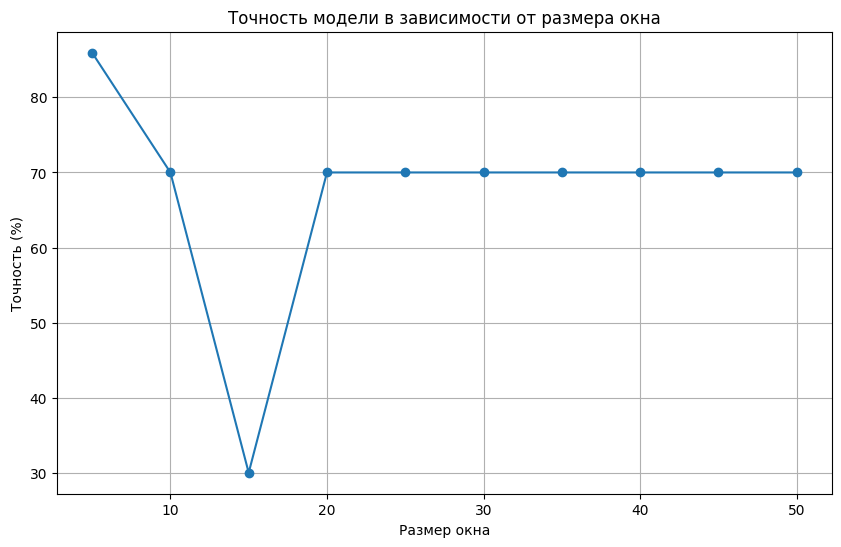

In [486]:
# Обучаем модель для разных размеров окон и строим график
window_sizes = range(5, 51, 5)
accuracies = []
import copy
for window in window_sizes:
    print(f"Окно: {window}")
    accuracy = train_nn_window(model_params, window)
    accuracies.append(accuracy)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, accuracies, marker='o')
plt.title("Точность модели в зависимости от размера окна")
plt.xlabel("Размер окна")
plt.ylabel("Точность (%)")
plt.grid(True)
plt.show()